# Project 2 - Two-mode Network Dataset (DATA 620)
## Topic: Baseball player steroid use
#### Authors: John Mazon, LeTicia Cancel, Bharani Nittala


Video: https://www.youtube.com/watch?v=m0lWKqD4fO0

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib

### Description of Dataset:

Two networks representing steroid use among baseball players. First, a bipartite network of players and their steroid providers (of illegal performance-enhancing substances). Second, a one-mode projection of players, which are linked if they have a common supplier.

### Background info
Social network analysis [SNA] is the mapping and measuring of relationships and flows between people, groups, organizations, computers, URLs, and other connected information/knowledge entities. The nodes in the network are the people and groups while the links show relationships or flows between the nodes. SNA provides both a visual and a mathematical analysis of human relationships. 

When the Mitchell Report, on steroid use in Major League Baseball [MLB], was published people were surprised at both the number and names of those who were mentioned. The diagram below shows a network map created from data found in the Mitchell Report. Baseball players are shown as well as those who were found to be providers of steroids and other illegal performance enhancing substances appear. The links reveal the flow of chemicals -- from providers to players.



# Section 1 - importing the data

In [2]:
#reading csv files
df_edges = pd.read_csv('band.csv/edges.csv')
df_nodes = pd.read_csv('band.csv/nodes.csv')

In [3]:
#initialize graph
G = nx.Graph()
print(df_edges)
print(df_nodes)

#we print the df_edges and df_nodes to visualize better the data

    # source   target
0         12        0
1         13        0
2         14        0
3         14        1
4         15        0
..       ...      ...
79        79       11
80        80       11
81        81       11
82        82       11
83        83       11

[84 rows x 2 columns]
    # index                            name                               _pos
0         0                           BALCO  array([ 0.42916385, -1.06252603])
1         1                   Greg_Anderson  array([ 0.92099285, -0.80835392])
2         2  Palm_Beach_Rejuvenation_Centre  array([-0.4604673 , -2.28633679])
3         3          New_Hope_Health_Centre  array([ 0.97088245, -4.86546354])
4         4              Signature_Pharmacy  array([-0.30669722, -3.17679839])
..      ...                             ...                                ...
79       79                       Mike_Bell  array([ 2.47275041, -3.19814548])
80       80                    Bart_Miadich  array([ 2.13836021, -2.33889511])
81

In [4]:
#find edges
def ObtainEdges(df):
    edges_list = [];
    for index, info in df.iterrows():
        edges_list.append((info[0], info[1]))

    return edges_list

In [5]:
#obtaining from df_edges to input into edges_list
edges_list = ObtainEdges(df_edges)

In [6]:
#print out a portion of the edges list
edges_list[0:10]

[(12, 0),
 (13, 0),
 (14, 0),
 (14, 1),
 (15, 0),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 0)]

In [7]:
#print out a portion of the df_nodes
df_nodes[0:10]

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
5,5,American_Pharmaceutical_Group,"array([ 2.95233045, -1.87045357])"
6,6,Health_Rejuvenation_Centre,"array([-0.45673428, -3.93778089])"
7,7,Applied_Pharmacy_Services,"array([ 0.10571343, -3.51182852])"
8,8,Arizona_AntiAging_Clinic,"array([ 0.30421134, -2.92204833])"
9,9,Health_Watch_Clinic,"array([-0.06342055, -3.96214378])"


In [8]:
# find nodes by using obtainAttr () which retrieves or creates the element's attribute
def ObtainAttr(df):
    attr_dict = dict()
    for index, info in df.iterrows():
        attr_dict[info[0]] = info[1];
    return attr_dict

In [9]:
attr_dict= ObtainAttr(df_nodes)

Below is the value combinations of nodes, relating to players and providers

In [10]:
attr_dict

{0: 'BALCO',
 1: 'Greg_Anderson',
 2: 'Palm_Beach_Rejuvenation_Centre',
 3: 'New_Hope_Health_Centre',
 4: 'Signature_Pharmacy',
 5: 'American_Pharmaceutical_Group',
 6: 'Health_Rejuvenation_Centre',
 7: 'Applied_Pharmacy_Services',
 8: 'Arizona_AntiAging_Clinic',
 9: 'Health_Watch_Clinic',
 10: 'BrianMcNamee',
 11: 'Kirk_Radomski',
 12: 'Victor_Conte',
 13: 'Jeremy_Giambi',
 14: 'Jason_Giambi',
 15: 'Gary_Sheffield',
 16: 'Bobby_Estalella',
 17: 'Benito_Santiago',
 18: 'Marvin_Bernard',
 19: 'Barry_Bonds',
 20: 'Armando_Rios',
 21: 'Randy_Velarde',
 22: 'Matt_Williams',
 23: 'Daren_Holmes',
 24: 'Paul_Byrd',
 25: 'Jose_Guillen',
 26: 'Ismael_Vaklez',
 27: 'Jason_Grimsley',
 28: 'Troy_Glaus',
 29: 'Scott_Schoeneweis',
 30: 'Steve_Woodward',
 31: 'Gary_MatthewsJr',
 32: 'David_Bell',
 33: 'Jose_Canseco',
 34: 'John_Rocker',
 35: 'Jay_Gibbons',
 36: 'Rick_Ankiel',
 37: 'Chuck_Knoblauch',
 38: 'Roger_Clemense',
 39: 'Andy_Pettittle',
 40: 'Brian_Roberts',
 41: 'Todd_Pratt',
 42: 'Tod_Hundl

# Section 2 - Part 1 - bipartite networks

To understand networks and their participants, we evaluate the location and grouping of nodes in the network. These measures give us insight into the various roles and groupings in a network -- who are the connectors, bridges, isolates, where are the clusters and who is in them, who is in the core of the network





In [11]:
#Creating a two mode network i.e Bipartite Networks from the above nodes and edges.
node_1 = list(attr_dict.keys())
node_2 = list(attr_dict.values())
G.add_nodes_from(node_1, bipartite=0)
G.add_nodes_from(node_2, bipartite=1)
# G.add_edges_from(edges_list)
# G.add_nodes_from(attr_dict.values())
G.add_edges_from(edges_list)

In [12]:
#printing the values in node_1 to see what the data looks like
print(node_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [13]:
#printing the values in node_2 to see what the data looks like
print(node_2)

['BALCO', 'Greg_Anderson', 'Palm_Beach_Rejuvenation_Centre', 'New_Hope_Health_Centre', 'Signature_Pharmacy', 'American_Pharmaceutical_Group', 'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'BrianMcNamee', 'Kirk_Radomski', 'Victor_Conte', 'Jeremy_Giambi', 'Jason_Giambi', 'Gary_Sheffield', 'Bobby_Estalella', 'Benito_Santiago', 'Marvin_Bernard', 'Barry_Bonds', 'Armando_Rios', 'Randy_Velarde', 'Matt_Williams', 'Daren_Holmes', 'Paul_Byrd', 'Jose_Guillen', 'Ismael_Vaklez', 'Jason_Grimsley', 'Troy_Glaus', 'Scott_Schoeneweis', 'Steve_Woodward', 'Gary_MatthewsJr', 'David_Bell', 'Jose_Canseco', 'John_Rocker', 'Jay_Gibbons', 'Rick_Ankiel', 'Chuck_Knoblauch', 'Roger_Clemense', 'Andy_Pettittle', 'Brian_Roberts', 'Todd_Pratt', 'Tod_Hundley', 'Kent_Mercker', 'Jerry_HarrisonJr', 'Jason_Christiansen', 'Matt_Herges', 'David_Segul', 'Matt_Franco', 'Adam_Riggs', 'Exavier_Logan', 'Fernando_Vina', 'Chad_Allen', 'Larry_Bigble', 'Eric_Gagne', 'Pau

In [14]:
#printing the values in edges_list to see what the data looks like
print(edges_list)

[(12, 0), (13, 0), (14, 0), (14, 1), (15, 0), (15, 1), (16, 1), (17, 1), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (27, 4), (28, 3), (29, 3), (30, 4), (31, 4), (31, 7), (32, 4), (32, 7), (32, 8), (33, 4), (33, 6), (33, 7), (33, 9), (34, 7), (35, 5), (36, 6), (37, 10), (38, 10), (39, 10), (40, 11), (41, 11), (42, 11), (43, 11), (44, 5), (44, 11), (45, 11), (46, 11), (47, 11), (48, 11), (49, 11), (50, 11), (51, 11), (52, 11), (53, 11), (54, 11), (55, 11), (56, 11), (57, 11), (58, 11), (59, 11), (60, 11), (61, 11), (62, 11), (63, 11), (64, 11), (65, 11), (66, 11), (67, 11), (68, 11), (69, 11), (70, 11), (71, 11), (72, 11), (73, 11), (74, 11), (75, 11), (76, 11), (77, 11), (78, 11), (79, 11), (80, 11), (81, 11), (82, 11), (83, 11)]


In [15]:
# Since the whole network contains undirected graphs also as well.
nx.is_connected(G)

False

In [16]:
G.nodes()
#using the g.nodes() we are able to clearly depict all the present nodes including players and providers

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 'BALCO', 'Greg_Anderson', 'Palm_Beach_Rejuvenation_Centre', 'New_Hope_Health_Centre', 'Signature_Pharmacy', 'American_Pharmaceutical_Group', 'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'BrianMcNamee', 'Kirk_Radomski', 'Victor_Conte', 'Jeremy_Giambi', 'Jason_Giambi', 'Gary_Sheffield', 'Bobby_Estalella', 'Benito_Santiago', 'Marvin_Bernard', 'Barry_Bonds', 'Armando_Rios', 'Randy_Velarde', 'Matt_Williams', 'Daren_Holmes', 'Paul_Byrd', 'Jose_Guillen', 'Ismael_Vaklez', 'Jason_Grimsley', 'Troy_Glaus', 'Scott_Schoeneweis', 'Steve_Woodward', 'Gary_MatthewsJr', 'David_Bell', 'Jose_Canseco', 'John_Rock

In [17]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 168
Number of edges: 84
Average degree:   1.0000


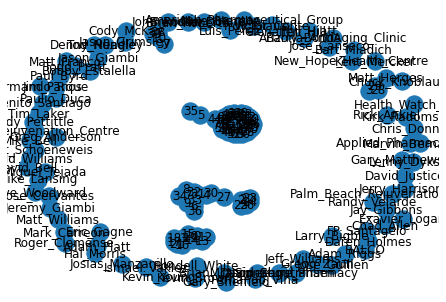

In [18]:
nx.draw(G,with_labels=True)

# Section 2 - Part 2 - bipartite networks

A subgraph is a subset of the nodes of a network, and all of the edges linking these nodes. Any group of nodes can form a subgraph—and further down we will describe several interesting ways to use this.

Component subgraphs (or simply components) are portions of the network that are disconnected from each other. 
Many real networks have multiple components.

NetworkX has a function for isolating connected components (connected_component_subgraphs(e)); the function returns an array of Graph objects corresponding to each of the connected components:



# S[0]

In [19]:
#finding every connected graphs in the whole network
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [20]:
len(S)

89

In [21]:
s = S[0].edges()
print(s)

[(0, 12), (0, 13), (0, 14), (0, 15), (0, 19), (0, 20), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21)]


In [22]:
# Now, we have 4 two mode directed networks from the whole network
nx.is_connected(S[0])

True

In [23]:
len(S[0])

12

In [24]:
nx.is_connected(S[0])

True

In [25]:
s_1 = [list(l) for l in s]
s_1

[[0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 19],
 [0, 20],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18],
 [1, 19],
 [1, 20],
 [1, 21]]

In [26]:
s_1 = [[item[0], attr_dict[item[1]]] for item in s_1]
s_1

[[0, 'Victor_Conte'],
 [0, 'Jeremy_Giambi'],
 [0, 'Jason_Giambi'],
 [0, 'Gary_Sheffield'],
 [0, 'Barry_Bonds'],
 [0, 'Armando_Rios'],
 [1, 'Jason_Giambi'],
 [1, 'Gary_Sheffield'],
 [1, 'Bobby_Estalella'],
 [1, 'Benito_Santiago'],
 [1, 'Marvin_Bernard'],
 [1, 'Barry_Bonds'],
 [1, 'Armando_Rios'],
 [1, 'Randy_Velarde']]

In [27]:
s_1 = [tuple(l) for l in s_1]
s_1


[(0, 'Victor_Conte'),
 (0, 'Jeremy_Giambi'),
 (0, 'Jason_Giambi'),
 (0, 'Gary_Sheffield'),
 (0, 'Barry_Bonds'),
 (0, 'Armando_Rios'),
 (1, 'Jason_Giambi'),
 (1, 'Gary_Sheffield'),
 (1, 'Bobby_Estalella'),
 (1, 'Benito_Santiago'),
 (1, 'Marvin_Bernard'),
 (1, 'Barry_Bonds'),
 (1, 'Armando_Rios'),
 (1, 'Randy_Velarde')]

In [28]:
def replace(list, dictionary):
    return [attr_dict.get(item, item) for item in list]
d = replace(S[0].nodes(),attr_dict)
print(d)

['BALCO', 'Greg_Anderson', 'Victor_Conte', 'Jeremy_Giambi', 'Jason_Giambi', 'Gary_Sheffield', 'Bobby_Estalella', 'Benito_Santiago', 'Marvin_Bernard', 'Barry_Bonds', 'Armando_Rios', 'Randy_Velarde']


In [29]:
S[0].clear()


In [30]:
S[0].nodes()

NodeView(())

In [31]:
S[0].edges()

EdgeView([])

In [32]:
S[0].add_nodes_from(d)

In [33]:
S[0].add_edges_from(s_1)

In [34]:
nx.is_connected(S[0])


False

<ipython-input-35-051501af3977>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


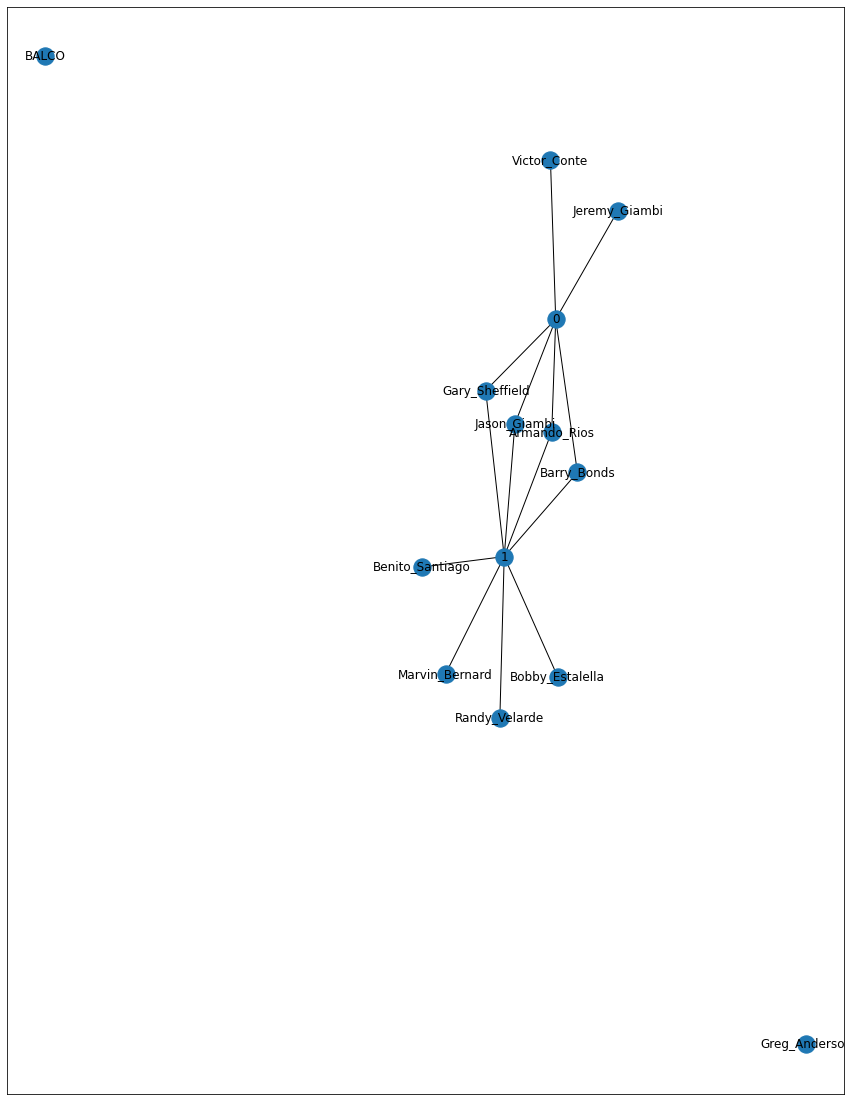

In [35]:
nx.draw_networkx(S[0],with_labels=True)
fig1 = matplotlib.pyplot.gcf()
fig1.set_size_inches(15, 20)
fig1.show()

By looking at the map above, it appears that the players taking steroids may be connected to each other. The hubs in the network above are the drug providers -- they appear to be the connectors who are controlling the process. We need to see other pictures/maps to get a better grasp of what is really happening. We take several views/pictures of social systems for the same since multiple views provide multiple insights.

Through player trades and free-agent signings, MLB does a good job of building multiple overlapping social networks. With players constantly changing teams, they form new links with new teammates, while maintaining many of their old ties to former teammates. This activity quickly creates a densely interconnected social network 

# Section 3 - part 1 - subnetworks analysis

# S[3]

In [36]:
f = S[3].edges()

In [37]:
nx.is_connected(S[3])

True

In [38]:
len(S[3])

47

In [39]:
nx.is_connected(S[3])

True

In [40]:
f_1 = [list(l) for l in f]
f_1

[[5, 35],
 [5, 44],
 [11, 40],
 [11, 41],
 [11, 42],
 [11, 43],
 [11, 44],
 [11, 45],
 [11, 46],
 [11, 47],
 [11, 48],
 [11, 49],
 [11, 50],
 [11, 51],
 [11, 52],
 [11, 53],
 [11, 54],
 [11, 55],
 [11, 56],
 [11, 57],
 [11, 58],
 [11, 59],
 [11, 60],
 [11, 61],
 [11, 62],
 [11, 63],
 [11, 64],
 [11, 65],
 [11, 66],
 [11, 67],
 [11, 68],
 [11, 69],
 [11, 70],
 [11, 71],
 [11, 72],
 [11, 73],
 [11, 74],
 [11, 75],
 [11, 76],
 [11, 77],
 [11, 78],
 [11, 79],
 [11, 80],
 [11, 81],
 [11, 82],
 [11, 83]]

In [41]:
f_1 = [[item[0], attr_dict[item[1]]] for item in f_1]
f_1

[[5, 'Jay_Gibbons'],
 [5, 'Jerry_HarrisonJr'],
 [11, 'Brian_Roberts'],
 [11, 'Todd_Pratt'],
 [11, 'Tod_Hundley'],
 [11, 'Kent_Mercker'],
 [11, 'Jerry_HarrisonJr'],
 [11, 'Jason_Christiansen'],
 [11, 'Matt_Herges'],
 [11, 'David_Segul'],
 [11, 'Matt_Franco'],
 [11, 'Adam_Riggs'],
 [11, 'Exavier_Logan'],
 [11, 'Fernando_Vina'],
 [11, 'Chad_Allen'],
 [11, 'Larry_Bigble'],
 [11, 'Eric_Gagne'],
 [11, 'Paulio_Duca'],
 [11, 'Brendan_Donnelly'],
 [11, 'Chris_Donnels'],
 [11, 'Cody_McKay'],
 [11, 'Mark_Carreon'],
 [11, 'Lenny_Dykstra'],
 [11, 'Rondell_White'],
 [11, 'FP_Santagelo'],
 [11, 'Mike_Stanton'],
 [11, 'Todd_Williams'],
 [11, 'Josias_Manzanillo'],
 [11, 'Jose_Cervantes'],
 [11, 'David_Justice'],
 [11, 'Adam_Platt'],
 [11, 'Miguel_Tejada'],
 [11, 'Kevin_Brown'],
 [11, 'Luis_Perez'],
 [11, 'Gregg_Zaun'],
 [11, 'Jeff_Williams'],
 [11, 'Kevin_Young'],
 [11, 'Tim_Laker'],
 [11, 'Hal_Morris'],
 [11, 'Mike_Lansing'],
 [11, 'Glenallen_Hill'],
 [11, 'Mike_Bell'],
 [11, 'Bart_Miadich'],
 [11, 'J

In [42]:
f_1 = [tuple(l) for l in f_1]
f_1

[(5, 'Jay_Gibbons'),
 (5, 'Jerry_HarrisonJr'),
 (11, 'Brian_Roberts'),
 (11, 'Todd_Pratt'),
 (11, 'Tod_Hundley'),
 (11, 'Kent_Mercker'),
 (11, 'Jerry_HarrisonJr'),
 (11, 'Jason_Christiansen'),
 (11, 'Matt_Herges'),
 (11, 'David_Segul'),
 (11, 'Matt_Franco'),
 (11, 'Adam_Riggs'),
 (11, 'Exavier_Logan'),
 (11, 'Fernando_Vina'),
 (11, 'Chad_Allen'),
 (11, 'Larry_Bigble'),
 (11, 'Eric_Gagne'),
 (11, 'Paulio_Duca'),
 (11, 'Brendan_Donnelly'),
 (11, 'Chris_Donnels'),
 (11, 'Cody_McKay'),
 (11, 'Mark_Carreon'),
 (11, 'Lenny_Dykstra'),
 (11, 'Rondell_White'),
 (11, 'FP_Santagelo'),
 (11, 'Mike_Stanton'),
 (11, 'Todd_Williams'),
 (11, 'Josias_Manzanillo'),
 (11, 'Jose_Cervantes'),
 (11, 'David_Justice'),
 (11, 'Adam_Platt'),
 (11, 'Miguel_Tejada'),
 (11, 'Kevin_Brown'),
 (11, 'Luis_Perez'),
 (11, 'Gregg_Zaun'),
 (11, 'Jeff_Williams'),
 (11, 'Kevin_Young'),
 (11, 'Tim_Laker'),
 (11, 'Hal_Morris'),
 (11, 'Mike_Lansing'),
 (11, 'Glenallen_Hill'),
 (11, 'Mike_Bell'),
 (11, 'Bart_Miadich'),
 (11, 'J

In [43]:
def replace(list, dictionary):
    return [attr_dict.get(item, item) for item in list]
j = replace(S[3].nodes(),attr_dict)
print(j)

['American_Pharmaceutical_Group', 'Kirk_Radomski', 'Jay_Gibbons', 'Brian_Roberts', 'Todd_Pratt', 'Tod_Hundley', 'Kent_Mercker', 'Jerry_HarrisonJr', 'Jason_Christiansen', 'Matt_Herges', 'David_Segul', 'Matt_Franco', 'Adam_Riggs', 'Exavier_Logan', 'Fernando_Vina', 'Chad_Allen', 'Larry_Bigble', 'Eric_Gagne', 'Paulio_Duca', 'Brendan_Donnelly', 'Chris_Donnels', 'Cody_McKay', 'Mark_Carreon', 'Lenny_Dykstra', 'Rondell_White', 'FP_Santagelo', 'Mike_Stanton', 'Todd_Williams', 'Josias_Manzanillo', 'Jose_Cervantes', 'David_Justice', 'Adam_Platt', 'Miguel_Tejada', 'Kevin_Brown', 'Luis_Perez', 'Gregg_Zaun', 'Jeff_Williams', 'Kevin_Young', 'Tim_Laker', 'Hal_Morris', 'Mike_Lansing', 'Glenallen_Hill', 'Mike_Bell', 'Bart_Miadich', 'Jim_Parque', 'Phil_Hiatt', 'Denny_Neagle']


In [44]:
S[3].clear()

In [45]:
S[3].nodes()

NodeView(())

In [46]:
S[3].edges()

EdgeView([])

In [47]:
S[3].add_nodes_from(d)

In [48]:
S[3].add_edges_from(s_1)

In [49]:
nx.is_connected(S[3])

False

<ipython-input-50-a51d1aaf5ea7>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


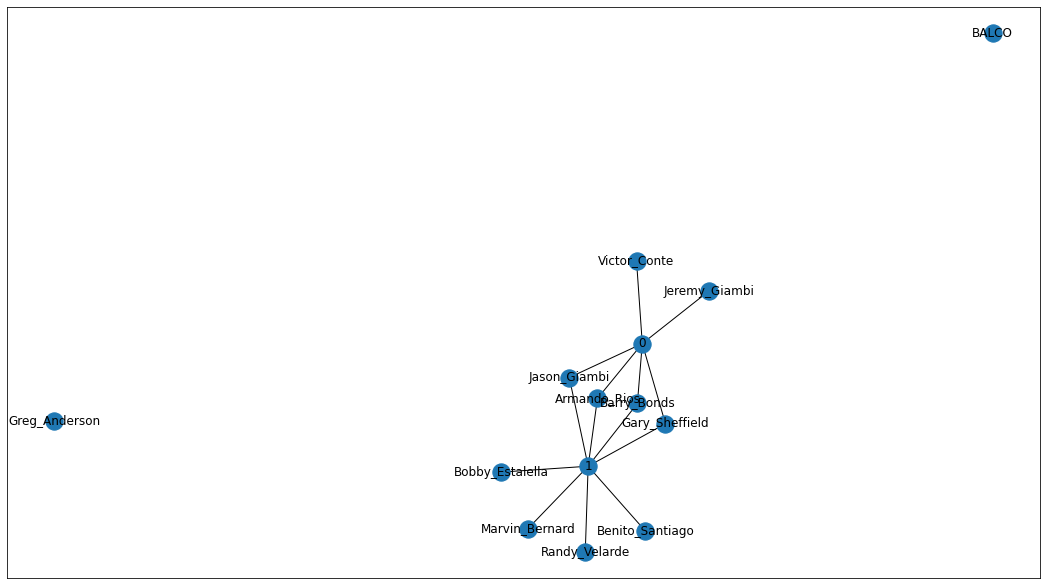

In [50]:
nx.draw_networkx(S[3],with_labels=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.show()


# Section 3 - part 2 - subnetworks analysis

# S[0] 

In graph theory and computer science, an adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. In the special case of a finite simple graph, the adjacency matrix is a-matrix with zeros on its diagonal.

In [51]:
# Representing the two mode network in matrix
A = nx.adjacency_matrix(S[0])
A

<14x14 sparse matrix of type '<class 'numpy.intc'>'
	with 28 stored elements in Compressed Sparse Row format>

In [52]:
print(A)

  (2, 12)	1
  (3, 12)	1
  (4, 12)	1
  (4, 13)	1
  (5, 12)	1
  (5, 13)	1
  (6, 13)	1
  (7, 13)	1
  (8, 13)	1
  (9, 12)	1
  (9, 13)	1
  (10, 12)	1
  (10, 13)	1
  (11, 13)	1
  (12, 2)	1
  (12, 3)	1
  (12, 4)	1
  (12, 5)	1
  (12, 9)	1
  (12, 10)	1
  (13, 4)	1
  (13, 5)	1
  (13, 6)	1
  (13, 7)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1


In [53]:
# labeling every islands on the two mode network
def label_island(lst):
    label =[]
    for i in lst:
        a = [n for n in G.neighbors(i)]
        label.append(a)
    return label

label_island(S[0].nodes)

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [12, 13, 14, 15, 19, 20],
 [14, 15, 16, 17, 18, 19, 20, 21]]

# S[1]

In [54]:
# Representing the two mode network in matrix
B = nx.adjacency_matrix(S[1])
B

<18x18 sparse matrix of type '<class 'numpy.intc'>'
	with 38 stored elements in Compressed Sparse Row format>

In [55]:
print(B)

  (0, 4)	1
  (0, 7)	1
  (0, 8)	1
  (1, 4)	1
  (1, 6)	1
  (1, 7)	1
  (1, 9)	1
  (2, 10)	1
  (2, 11)	1
  (2, 12)	1
  (2, 13)	1
  (2, 14)	1
  (2, 15)	1
  (3, 7)	1
  (4, 0)	1
  (4, 1)	1
  (4, 15)	1
  (4, 16)	1
  (4, 17)	1
  (5, 6)	1
  (6, 1)	1
  (6, 5)	1
  (7, 0)	1
  (7, 1)	1
  (7, 3)	1
  (7, 17)	1
  (8, 0)	1
  (9, 1)	1
  (10, 2)	1
  (11, 2)	1
  (12, 2)	1
  (13, 2)	1
  (14, 2)	1
  (15, 2)	1
  (15, 4)	1
  (16, 4)	1
  (17, 4)	1
  (17, 7)	1


In [56]:
# labeling every islands on the two mode network
def label_island(lst):
    label =[]
    for i in lst:
        b = [n for n in G.neighbors(i)]
        label.append(b)
    return label

In [57]:
label_island(S[1].nodes)

[[4, 7, 8],
 [4, 6, 7, 9],
 [22, 23, 24, 25, 26, 27],
 [7],
 [27, 30, 31, 32, 33],
 [6],
 [33, 36],
 [31, 32, 33, 34],
 [32],
 [33],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2, 4],
 [4],
 [4, 7]]

# Section 4 - infering subgroups analysis

###### Bipartite networks (or two mode networks) are a type of network in which nodes (or players) can be divided into two subsets based on the fact that there are no links between actors within each subset, only between the two. Because the performers are divided into two groups and there are no relationships between them,

###### As we see in the whole undirected network, there are edges which exists between each and every nodes. Also after finding the largest two mode network from the first network, We will find other separate edges between the new nodes of the two mode network.

In [58]:
# finding edges of the two mode network
print(S[0].edges)

[('Victor_Conte', 0), ('Jeremy_Giambi', 0), ('Jason_Giambi', 0), ('Jason_Giambi', 1), ('Gary_Sheffield', 0), ('Gary_Sheffield', 1), ('Bobby_Estalella', 1), ('Benito_Santiago', 1), ('Marvin_Bernard', 1), ('Barry_Bonds', 0), ('Barry_Bonds', 1), ('Armando_Rios', 0), ('Armando_Rios', 1), ('Randy_Velarde', 1)]


###### These edges exists between the newly formed nodes of the two mode network. Like this, we can infer the subgroups of the two mode network.

# Conclusion
Social network researchers measure network activity for a node by using the concept of degrees -- the number of direct connections a node has. In the analysis above, we see the providers have the most direct connections in the network, making them the most active nodes in the network. 
Providers are a 'connector' or 'hub' in this network. Common wisdom in personal networks is "the more connections, the better." This is not always so. What really matters is where those connections lead to -- and how they connect the otherwise unconnected.

## Citation
V. Krebs, "The Spread of Steroids in Baseball." http://orgnet.com/steroids.html (2008)